In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 999

In [4]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [5]:
data.shape

(2940, 35)

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
data.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [8]:
data.Attrition = data.Attrition.map({'Yes':1, 'No':0})

In [9]:
data.Attrition.value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
obj_cols = data.dtypes[data.dtypes == 'object'].index

In [14]:
obj_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [32]:
data.BusinessTravel.value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

In [15]:
pd.get_dummies(data.OverTime, drop_first=True)

,Yes
0,1
1,0
2,1
3,1
4,0
5,0
6,1
7,0
8,0
9,0


In [16]:
for cols in obj_cols:
    data = data.join(pd.get_dummies(data[cols], prefix=cols, drop_first=True))

In [31]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [18]:
data_new = data.drop(obj_cols, axis=1)

In [19]:
data_new.shape

(2940, 48)

In [20]:
x = data_new.drop('Attrition', axis=1)
y = data_new['Attrition']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

## Feature Selection

In [46]:
rndf = RandomForestClassifier(n_estimators=150)

In [47]:
rndf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_}).sort_values(by='importance', ascending=False)

In [49]:
importance

,cols,importance
11,MonthlyIncome,0.067660
0,Age,0.055887
46,OverTime_Yes,0.051248
1,DailyRate,0.050624
12,MonthlyRate,0.049735
2,DistanceFromHome,0.046324
19,TotalWorkingYears,0.046198
7,HourlyRate,0.043101
22,YearsAtCompany,0.039378
14,PercentSalaryHike,0.035692


In [28]:
import seaborn as sns

In [29]:
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

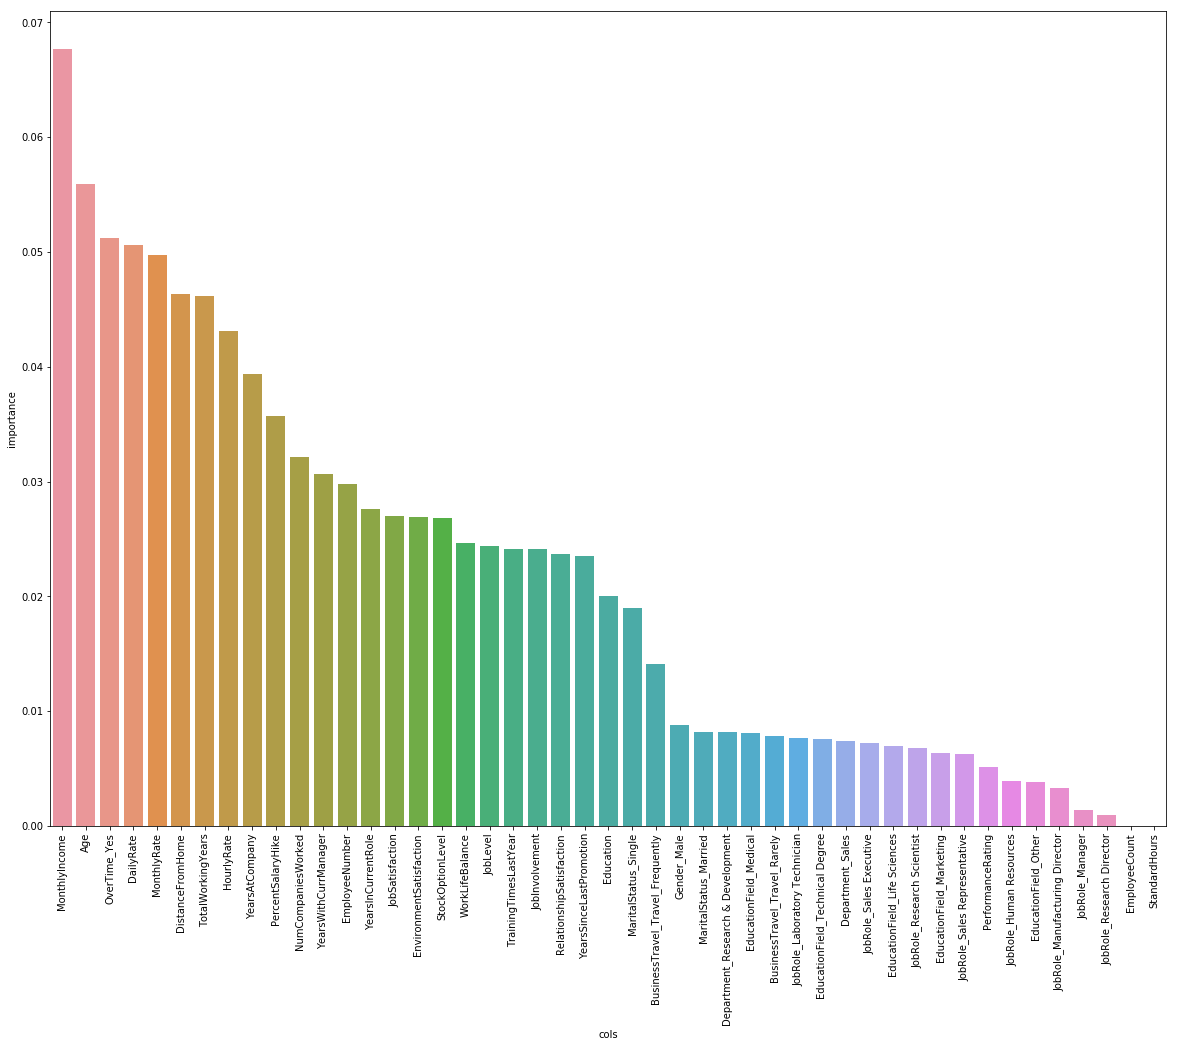

In [50]:
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [51]:
data_new.groupby('Attrition').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,2466.0,37.561233,8.886557,18.0,31.0,36.0,43.0,60.0
1,474.0,33.607595,9.679102,18.0,28.0,32.0,39.0,58.0


In [52]:
imp_cols = importance[importance.importance >= 0.01].cols.values

In [43]:
imp_cols

array(['MonthlyIncome', 'Age', 'TotalWorkingYears', 'OverTime_Yes',
       'MonthlyRate', 'DailyRate', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobLevel', 'YearsInCurrentRole',
       'StockOptionLevel', 'YearsSinceLastPromotion', 'JobSatisfaction',
       'WorkLifeBalance', 'TrainingTimesLastYear', 'JobInvolvement',
       'RelationshipSatisfaction', 'Education',
       'BusinessTravel_Travel_Frequently', 'MaritalStatus_Single'],
      dtype=object)

# Model Selection

In [53]:
names = ["Decision Tree", "Random Forest", "AdaBoost", "Logisic", "GBM"]

In [74]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=200, max_depth=12),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100)]

In [75]:
list(zip(names, classifiers))

[('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('Random Forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=12, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=100, random_state=None)),
 ('Logisic',
  Lo

In [89]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train, y_train) #[imp_cols]
    pred_train_y = clf[1].predict(x_train)
    pred_test_y = clf[1].predict(x_test)
    print(clf[0], metrics.accuracy_score(pred_train_y, y_train), metrics.precision_score(pred_train_y, y_train)) #[imp_cols]
    print(clf[0], metrics.accuracy_score(pred_test_y, y_test), metrics.precision_score(pred_test_y, y_test)) #[imp_cols]

Decision Tree 0.9064625850340136 0.46883468834688347
Decision Tree 0.8571428571428571 0.3333333333333333
Random Forest 0.9974489795918368 0.983739837398374
Random Forest 0.9370748299319728 0.6666666666666666
AdaBoost 0.9183673469387755 0.5772357723577236
AdaBoost 0.8996598639455783 0.5523809523809524
Logisic 0.8839285714285714 0.3089430894308943
Logisic 0.8605442176870748 0.26666666666666666


K:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GBM 0.9549319727891157 0.7208672086720868
GBM 0.8996598639455783 0.4857142857142857


In [90]:
model = RandomForestClassifier(n_estimators=200, max_depth=20)

In [91]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
model.score(x_test, y_test)

0.9574829931972789

In [ ]:
Decision Tree 0.8826530612244898 0.30952380952380953
Random Forest 0.9778911564625851 0.8452380952380952
AdaBoost 0.9013605442176871 0.5
Logisic 0.9115646258503401 0.42857142857142855
GBM 0.9183673469387755 0.4642857142857143

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
for clf in zip(names, classifiers):
    print(clf[0])
    pred = clf[1].predict(x_test)
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test)) # [imp_cols]
    print('*'*20)

Decision Tree
[[469  70]
 [ 14  35]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       539
           1       0.33      0.71      0.45        49

   micro avg       0.86      0.86      0.86       588
   macro avg       0.65      0.79      0.69       588
weighted avg       0.92      0.86      0.88       588

********************
Random Forest
[[481  35]
 [  2  70]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       516
           1       0.67      0.97      0.79        72

   micro avg       0.94      0.94      0.94       588
   macro avg       0.83      0.95      0.88       588
weighted avg       0.96      0.94      0.94       588

********************
AdaBoost
[[471  47]
 [ 12  58]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       518
           1       0.55      0.83      0.66        70

   micro avg       0.90      0.90 

In [94]:
cross_val_score(classifiers[1], x_train, y_train, cv=5)

array([0.93842887, 0.92356688, 0.94692144, 0.96170213, 0.92963753])

In [100]:
from sklearn.model_selection import GridSearchCV

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
from scipy.stats import randint as sp_randint

## Random Search CV - Hyperparameter search using Cross-Validation

In [97]:
param_dist = {"max_depth": [5, None],
              #"max_features": sp_randint(2, 11),
              "n_estimators": sp_randint(50, 150),
              "min_samples_split": sp_randint(2, 6),
              "min_samples_leaf": sp_randint(1, 6),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [ ]:
help(RandomizedSearchCV)

In [111]:
rscv = RandomizedSearchCV(classifiers[1], param_distributions=param_dist, n_iter=10, verbose=0, scoring='precision',cv=10)

In [112]:
rscv.fit(x_train[imp_cols], y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [5, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000227FA1245C0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000227F88EA358>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000227FA97F3C8>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_job

In [113]:
rscv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 137}

In [114]:
y_test_pred = rscv.predict(x_test[imp_cols])

In [115]:
rscv.score(x_test[imp_cols], y_test)

0.9770114942528736

In [116]:
metrics.precision_score(y_test_pred, y_test)

0.8095238095238095

## Grid Search CV

In [117]:
param_dist = {"max_depth": [5, None],
              #"max_features": sp_randint(2, 11),
              "n_estimators": [50, 100, 150],
              "min_samples_split": [2, 3, 4, 5],
              "min_samples_leaf": [2,3,4,5,6],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [118]:
rscv_grid = GridSearchCV(classifiers[1], param_grid=param_dist, verbose=1, n_jobs=15)

In [119]:
rscv_grid.fit(x_train[imp_cols], y_train)

K:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   19.8s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   48.1s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  1.6min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  3.0min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  4.7min
[Parallel(n_jobs=15)]: Done 1440 out of 1440 | elapsed:  5.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=15,
       param_grid={'max_depth': [5, None], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5, 6], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [120]:
rscv_grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [121]:
model = rscv_grid.best_estimator_
model.fit(x_train[imp_cols], y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [122]:
model.score(x_test[imp_cols], y_test)

0.9659863945578231

# KS Statistics - Kolmogorov–Smirnov Test -- (K-S Test)

In [123]:
predict_probas = rscv.predict_proba(x_test[imp_cols])
y_test_pred = rscv.predict(x_test[imp_cols])

In [124]:
predict_probas

array([[0.9136253 , 0.0863747 ],
       [0.98540146, 0.01459854],
       [0.97323601, 0.02676399],
       ...,
       [0.99391727, 0.00608273],
       [0.98540146, 0.01459854],
       [0.99391727, 0.00608273]])

In [125]:
new_df = pd.DataFrame.from_dict({'target': y_test,'predict':y_test_pred, 'pred_prob_0':predict_probas[:,0], 'pred_prob_1': predict_probas[:,1]})

In [126]:
new_df = new_df.sort_values(by='pred_prob_1', ascending=False)

In [127]:
np.linspace(0,1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [128]:
splits = []
range_space = np.linspace(1,0, 11)
for i in range(1, len(range_space)):
    print(range_space[i-1], range_space[i])
    print(new_df.loc[(new_df.pred_prob_1 <= range_space[i-1]) & (new_df.pred_prob_1 > range_space[i])])

1.0 0.9
      target  predict  pred_prob_0  pred_prob_1
911        1        1     0.015815     0.984185
2201       1        1     0.030414     0.969586
2623       1        1     0.040146     0.959854
1012       1        1     0.047445     0.952555
102        1        1     0.057178     0.942822
2126       1        1     0.064477     0.935523
2606       1        1     0.083942     0.916058
2743       1        1     0.090024     0.909976
1375       1        1     0.093674     0.906326
1496       1        1     0.094891     0.905109
0.9 0.8
      target  predict  pred_prob_0  pred_prob_1
192        1        1     0.118613     0.881387
1365       1        1     0.122749     0.877251
171        1        1     0.122871     0.877129
589        1        1     0.131387     0.868613
1369       1        1     0.133820     0.866180
1032       1        1     0.141119     0.858881
2741       1        1     0.146594     0.853406
2133       1        1     0.155596     0.844404
2312       1        1   

In [129]:
splits = np.array_split(new_df.values, 10)

In [130]:
splits[-1]

array([[0.        , 0.        , 0.99148418, 0.00851582],
       [0.        , 0.        , 0.99148418, 0.00851582],
       [0.        , 0.        , 0.99148418, 0.00851582],
       [0.        , 0.        , 0.99148418, 0.00851582],
       [0.        , 0.        , 0.99148418, 0.00851582],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        , 0.99270073, 0.00729927],
       [0.        , 0.        ,

In [131]:
ks_df = pd.DataFrame(columns=['count', '1s', '0s', 'pos_per', 'neg_per'])

In [132]:
list_of_dict = []

In [133]:
for split in splits:
    cnt = split.shape[0]
    pred_target_pos = split[:,3].sum()
    pred_target_neg = cnt - pred_target_pos
    pos_per = pred_target_pos / cnt
    neg_per = pred_target_neg / cnt
    list_of_dict.append({'count': cnt, '1s': pred_target_pos, '0s': pred_target_neg, 'pos_per': pos_per, 'neg_per': neg_per})

In [134]:
metric_data = pd.DataFrame.from_dict(list_of_dict)

In [135]:
metric_data

,0s,1s,count,neg_per,pos_per
0,10.844647,48.155353,59,0.183808,0.816192
1,31.481509,27.518491,59,0.533585,0.466415
2,50.779684,8.220316,59,0.860673,0.139327
3,54.206326,4.793674,59,0.918751,0.081249
4,55.636861,3.363139,59,0.942998,0.057002
5,56.682482,2.317518,59,0.960720,0.039280
6,57.340633,1.659367,59,0.971875,0.028125
7,57.838200,1.161800,59,0.980308,0.019692
8,57.275547,0.724453,58,0.987509,0.012491
9,57.706813,0.293187,58,0.994945,0.005055


In [136]:
metric_data['0s_cumsum'] = metric_data['0s'].cumsum()
metric_data['1s_cumsum'] = metric_data['1s'].cumsum()
metric_data['0s_cumsum_per'] = metric_data['0s_cumsum'] / metric_data['0s'].sum()
metric_data['1s_cumsum_per'] = metric_data['1s_cumsum'] / metric_data['1s'].sum()
metric_data['cum_pop_%'] = (metric_data.index + 1) * 10

In [137]:
metric_data['lift_decile'] = 1000 * metric_data['1s'] / metric_data['1s'].sum()
metric_data['lift_total'] = 10000 * metric_data['1s_cumsum_per'] / metric_data['cum_pop_%']

In [138]:
metric_data['ks'] = metric_data['1s_cumsum_per'] - metric_data['0s_cumsum_per']

In [139]:
metric_data

,0s,1s,count,neg_per,pos_per,0s_cumsum,1s_cumsum,0s_cumsum_per,1s_cumsum_per,cum_pop_%,lift_decile,lift_total,ks
0,10.844647,48.155353,59,0.183808,0.816192,10.844647,48.155353,0.022141,0.490344,10,490.343927,490.343927,4.682026e-01
1,31.481509,27.518491,59,0.533585,0.466415,42.326156,75.673844,0.086416,0.770552,20,280.208209,385.276068,6.841357e-01
2,50.779684,8.220316,59,0.860673,0.139327,93.105839,83.894161,0.190092,0.854256,30,83.703720,284.751952,6.641635e-01
3,54.206326,4.793674,59,0.918751,0.081249,147.312165,88.687835,0.300764,0.903068,40,48.811789,225.766911,6.023033e-01
4,55.636861,3.363139,59,0.942998,0.057002,202.949027,92.050973,0.414357,0.937313,50,34.245303,187.462590,5.229560e-01
5,56.682482,2.317518,59,0.960720,0.039280,259.631509,94.368491,0.530084,0.960911,60,23.598228,160.151863,4.308267e-01
6,57.340633,1.659367,59,0.971875,0.028125,316.972141,96.027859,0.647156,0.977808,70,16.896579,139.686822,3.306520e-01
7,57.838200,1.161800,59,0.980308,0.019692,374.810341,97.189659,0.765243,0.989638,80,11.830083,123.704730,2.243950e-01
8,57.275547,0.724453,58,0.987509,0.012491,432.085888,97.914112,0.882181,0.997015,90,7.376769,110.779401,1.148335e-01
9,57.706813,0.293187,58,0.994945,0.005055,489.792701,98.207299,1.000000,1.000000,100,2.985393,100.000000,2.220446e-16


Text(0, 0.5, 'ks')

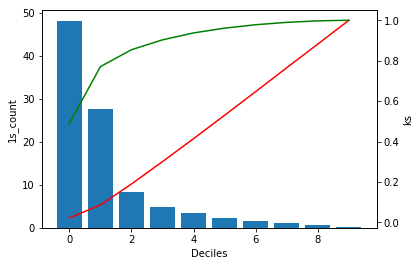

In [140]:
fig, ax1 = plt.subplots()

ax1.bar(metric_data.index, metric_data['1s'])
ax1.set_ylabel('1s_count')
ax1.set_xlabel('Deciles')
ax2 = ax1.twinx()

ax2.plot(metric_data['0s_cumsum_per'], color='red')
ax2.plot(metric_data['1s_cumsum_per'], color='green')
ax2.set_ylabel('ks')

# ROC AUC Curve

In [141]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probas[:,1])

In [142]:
roc_df = pd.DataFrame.from_dict({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})

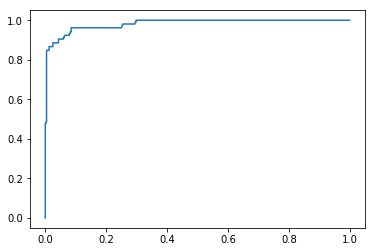

In [143]:
plt.plot(fpr, tpr)

In [144]:
?metrics.roc_auc_score

Signature:
metrics.roc_auc_score(
    ['y_true', 'y_score', "average='macro'", 'sample_weight=None', 'max_fpr=None'],
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from prediction scores.

Note: this implementation is restricted to the binary classification task
or multilabel classification task in label indicator format.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array, shape = [n_samples] or [n_samples, n_classes]
    True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers). For binary
    y_true, y_score is supposed to be the score of the class with greater
    label.

average : string, [None, 'micro', 'macro' (default), 'samples', 'weighted']
    If ``

In [145]:
metrics.roc_auc_score(y_test, predict_probas[:,1])

0.982155180912945

In [153]:
(predict_probas[:,1] >= 0.3).sum()/ y_test.sum()

0.9619047619047619

In [154]:
pd.DataFrame.from_dict({'thres': thresholds, 'fpr': fpr, 'tpr':tpr})

,thres,fpr,tpr
0,1.984185,0.000000,0.000000
1,0.984185,0.000000,0.009524
2,0.825426,0.000000,0.219048
3,0.819951,0.000000,0.238095
4,0.740876,0.000000,0.476190
5,0.736010,0.002070,0.476190
6,0.736010,0.002070,0.485714
7,0.732360,0.004141,0.485714
8,0.576642,0.004141,0.752381
9,0.571776,0.004141,0.771429


### Saving your Model

In [158]:
import pickle as pk #Saving any model as object in file
import pandas as pd

In [164]:
pk.dump(rscv.best_estimator_,open('model.pkl','wb'))

In [169]:
sample=x_train[imp_cols].sample(10)
sample.to_csv('prod_sample.csv',index=None)
rscv.predict(sample)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [170]:
model = pk.load(open('model.pkl','rb'))
test_data = pd.read_csv('prod_sample.csv')
model.predict(test_data)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)